# Credit Scoring Model Development

In this project, we aim to develop a credit scoring model that predicts the likelihood of credit default. The model is based on the German Credit Data from the UCI Machine Learning Repository. We will explore the dataset, preprocess the data, build a logistic regression model as a baseline, and explore ways to improve the model for robust credit risk assessment.


In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentDuration', 'InstallmentRate', 'PersonalStatus', 'Debtors', 'ResidenceDuration', 'Property', 'Age', 'InstallmentPlans', 'Housing', 'CreditsAtBank', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker', 'CreditRisks']
df=pd.read_csv(url,sep=' ',header=None,names=columns)


In [2]:
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentDuration,InstallmentRate,PersonalStatus,Debtors,...,Property,Age,InstallmentPlans,Housing,CreditsAtBank,Job,PeopleLiable,Telephone,ForeignWorker,CreditRisks
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Categorical Variable Encoding

The dataset contains various categorical features that represent different attributes of credit applicants, such as their checking account status, purpose of the credit, savings account/bonds, personal status and sex, among others. These categorical features are encoded with numerical codes which are not immediately interpretable.

To facilitate analysis and ensure our data is more readable, we will map these numerical codes back to their original categorical descriptions as provided in the dataset documentation. This will help us in the exploratory data analysis phase to better understand the distribution and impact of each attribute on the credit risk.

The mappings are constructed based on the attribute information available on the UCI Machine Learning Repository for the German Credit Data dataset. Additionally, the dataset has been confirmed to have no missing values as per the UCI repository information.

Below, we define the mappings for each categorical feature, which will then be used to transform the dataset into a more interpretable form.


In [3]:

status_mapping = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '... >= 200 DM / salary assignments for at least 1 year',
    'A14': 'no checking account'
}

purpose_mapping = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation - does not exist?',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

savings_mapping = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown/no savings account'
}

personal_status_mapping = {
    'A91': 'male : divorced/separated',
    'A92': 'female : divorced/separated/married',
    'A93': 'male : single',
    'A94': 'male : married/widowed',
    'A95': 'female : single'
}

debtors_mapping = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

property_mapping = {
    'A121': 'real estate',
    'A122': 'if not A121: building society savings agreement/life insurance',
    'A123': 'if not A121/A122: car or other, not in attribute 6',
    'A124': 'unknown / no property'
}

installment_plans_mapping = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

job_mapping = {
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified employee/ officer'
}

housing_mapping = {
          'A151' : 'rent',
          'A152' : 'own',
          'A153' : 'for free'
}

telephone_mapping = {
        'A191' : 'none',
        'A192' : 'yes, registered under the customers name'
    }

foreign_worker_mapping = {
         'A201' : 'yes',
         'A202' : 'no'
    }
credit_history_mapping ={
     'A30' : 'no credits taken/ all credits paid back duly',
    'A31' : 'all credits at this bank paid back duly',
     'A32' : 'existing credits paid back duly till now',
     'A33' : 'delay in paying off in the past',
      'A34' : 'critical account/  other credits existing (not at this bank)'
    
}
employement_duration_mapping = {
    'A71' : 'unemployed',
    'A72' :       '... < 1 year',
    'A73' : '1  <= ... < 4 years',
    'A74' : '4  <= ... < 7 years',
    'A75' :   '.. >= 7 years'
}
credit_risk_mapping = {1: 'Good', 2: 'Bad'}

all_categorical_mapping = {
    'Status' : status_mapping,
    'Purpose' : purpose_mapping,
    'Savings':savings_mapping,
    'PersonalStatus':personal_status_mapping,
    'Debtors':debtors_mapping,
    'Property':property_mapping,
    'InstallmentPlans':installment_plans_mapping,
    'Job':job_mapping,
    'CreditRisks':credit_risk_mapping,
    'Housing':housing_mapping,
    'Telephone':telephone_mapping,
    'ForeignWorker':foreign_worker_mapping,
    'CreditHistory':credit_history_mapping,
    'EmploymentDuration':employement_duration_mapping
    
}


In [4]:
df_viz= df.copy()
for column,mapping in all_categorical_mapping.items():
    df_viz[column]=df_viz[column].map(mapping)

In [5]:
df_viz.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentDuration,InstallmentRate,PersonalStatus,Debtors,...,Property,Age,InstallmentPlans,Housing,CreditsAtBank,Job,PeopleLiable,Telephone,ForeignWorker,CreditRisks
0,< 0 DM,6,critical account/ other credits existing (not...,radio/television,1169,unknown/no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,no checking account,12,critical account/ other credits existing (not...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121: building society savings agreemen...,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad


In [6]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status              1000 non-null   object
 1   Duration            1000 non-null   int64 
 2   CreditHistory       1000 non-null   object
 3   Purpose             1000 non-null   object
 4   CreditAmount        1000 non-null   int64 
 5   Savings             1000 non-null   object
 6   EmploymentDuration  1000 non-null   object
 7   InstallmentRate     1000 non-null   int64 
 8   PersonalStatus      1000 non-null   object
 9   Debtors             1000 non-null   object
 10  ResidenceDuration   1000 non-null   int64 
 11  Property            1000 non-null   object
 12  Age                 1000 non-null   int64 
 13  InstallmentPlans    1000 non-null   object
 14  Housing             1000 non-null   object
 15  CreditsAtBank       1000 non-null   int64 
 16  Job                 1000 

In [7]:
df_viz.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceDuration,Age,CreditsAtBank,PeopleLiable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# Exploratory Analysis

In this section, we delve into the Univariate Analysis of our dataset. The goal here is to explore each variable individually to gain insights into the dataset's structure and to uncover underlying patterns within each feature. This analysis is crucial as it will help us understand the distribution of each attribute, detect any outliers, and identify any skewness in our data.

For our categorical variables, we will visualize the frequency distribution of each category to understand the diversity and count within each feature. This is particularly important for identifying imbalances or biases towards certain categories that could influence our model's predictions.

For our numerical variables, we will look at their distributions to identify patterns and potential outliers, which are essential for understanding the range and the central tendency of the values.

By the end of this analysis, we should have a thorough understanding of the characteristics of each variable, which will guide us in making informed decisions during the data preprocessing stage. Let's begin by examining the distribution of our categorical variables.


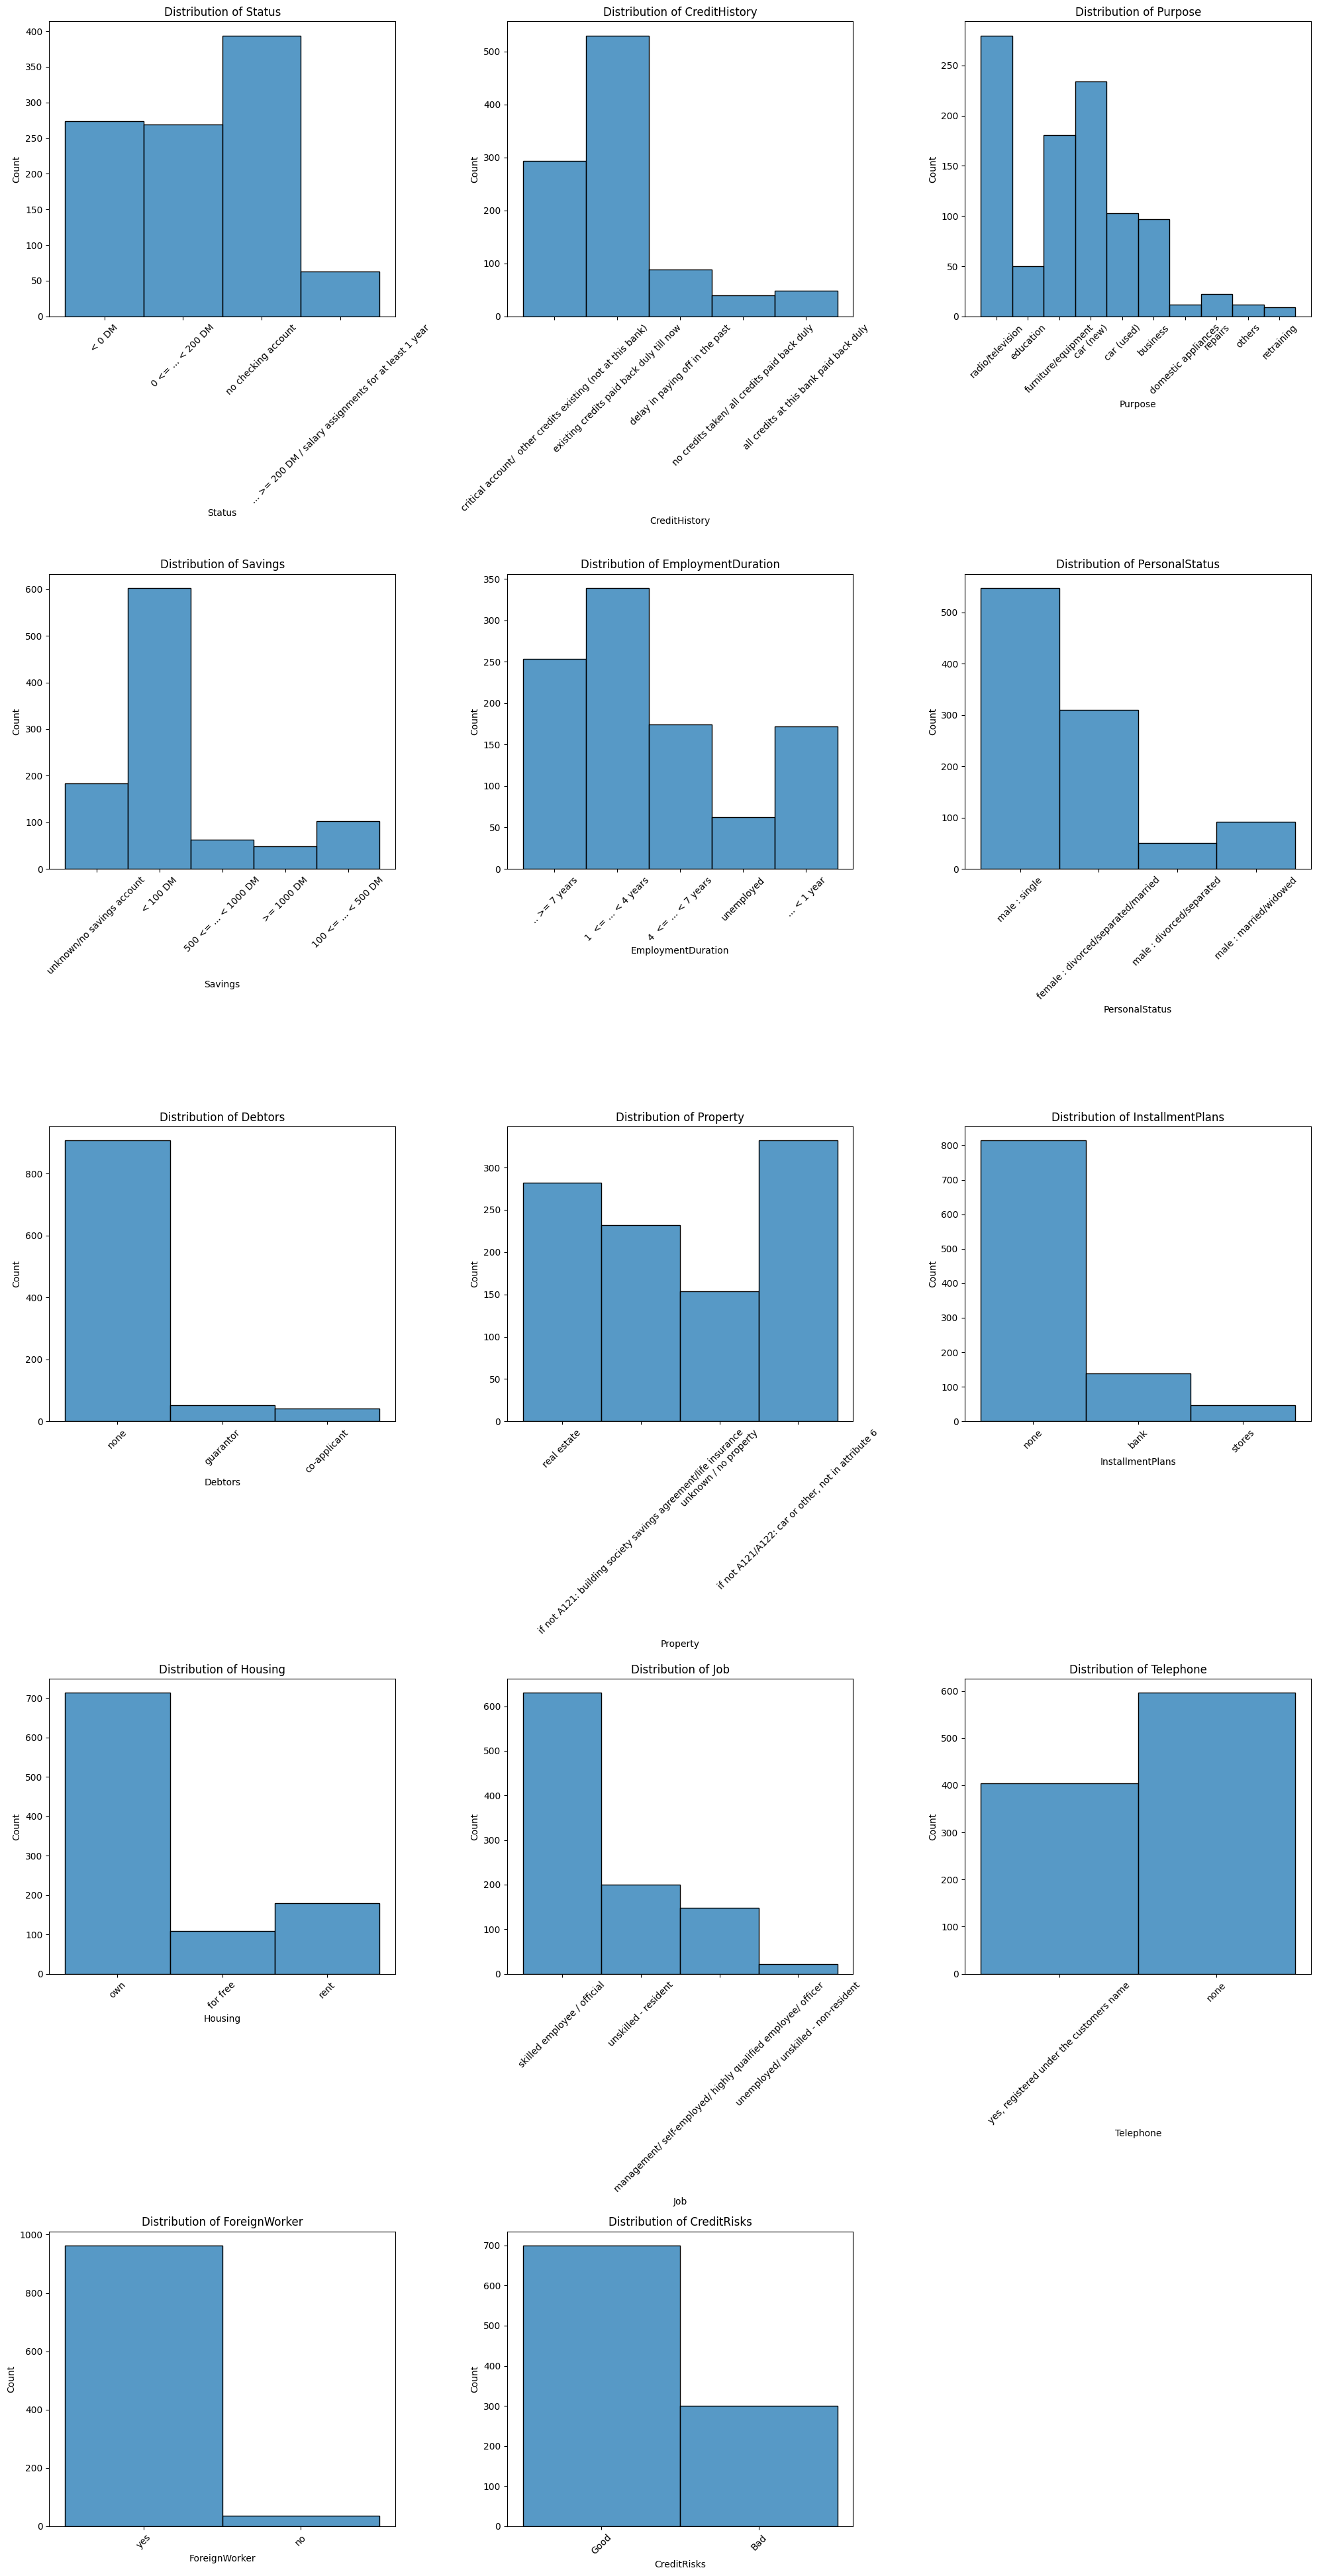

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars = df_viz.select_dtypes(include=['object', 'category']).columns.tolist()
num_vars = df_viz.select_dtypes(include=[np.number]).columns.tolist()


num_plots = len(cat_vars)-1
num_columns = 3
num_rows = num_plots // num_columns + (num_plots%num_columns > 0)
plt.figure(figsize=(num_rows*4,num_columns*13))
for i,col in enumerate(cat_vars):
        plt.subplot(num_rows,num_columns,i+1)
        sns.histplot(df_viz[col])
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=4, wspace=0.3)

plt.tight_layout()                  

# Univariate Analysis for Catagorical Observations

After examining the distribution of several categorical variables in our dataset, we have uncovered some important patterns and potential biases that could significantly impact our credit scoring model.

## Credit Risks

The bar chart for 'CreditRisks' reveals a noticeable class imbalance, with a considerably higher count of "Good" credit risks compared to "Bad". This imbalance is a critical point to consider as it might lead our model to be biased towards predicting "Good" credit risks, potentially overlooking applicants who pose a higher risk of default.

## Foreign Worker Representation

The distribution of 'ForeignWorker' indicates that the majority of applicants are not foreign workers. This could be reflective of the demographics of the dataset or could suggest that foreign workers are less likely to apply for credit in this context. If being a foreign worker influences credit risk, this imbalance might affect the model's ability to generalize to the broader population.

## Debtors

The 'Debtors' variable shows an overwhelming majority of applicants do not have co-applicants or guarantors. This finding could suggest that most credit applications are individual risks without additional security, which might increase the importance of other variables in assessing credit risk.

## Purpose of Credit

The 'Purpose' variable shows a varied distribution, with 'radio/television' being the most common purpose for credit application, followed by 'car (new)' and 'furniture/equipment'. The lower frequency of purposes such as 'retraining' or 'domestic appliances' suggests these are less common motivations for seeking credit. This distribution gives us a glimpse into the common financial needs of the applicants and may help us understand the context behind credit applications.

## Status of Checking Account

For the 'Status' variable, a significant number of applicants fall into the 'no checking account' category, followed by '< 0 DM', '0 <= ... < 200 DM', with very few in the '... >= 200 DM / salary assignments for at least 1 year' category. This distribution is particularly revealing as:
- The large proportion of applicants with 'no checking account' may indicate a segment of the population that is either financially conservative or lacks access to typical banking products.
- The presence of applicants with '< 0 DM' may signal financial distress, potentially making them higher credit risks.
- The sparse representation of individuals with '... >= 200 DM / salary assignments for at least 1 year' could imply that such financially stable individuals are less represented in credit applications, possibly due to different borrowing needs or behaviors.

## CreditHistory

- **Most Common Credit History**: The most frequent category in 'CreditHistory' is 'existing credits paid back duly till now'. This indicates that a significant portion of the applicants have a history of managing their credit responsibly, which may suggest a lower risk of default for these individuals.

- **Critical Accounts**: The 'critical account/other credits existing (not at this bank)' category, while not the most common, is notable. This could indicate a credit history with negative remarks, typically associated with higher risk in credit scoring models, and could be a strong predictor of 'Bad' credit risk.

- **No or Little Credit History**: Categories representing little to no credit history are also present and may not necessarily indicate a negative credit history but do suggest a lack of credit experience. This can be tricky for lenders to interpret, and our credit scoring model might need to consider additional factors to accurately assess the risk for these applicants.

- **Delayed Payments**: A smaller number of applicants have 'delay in paying off in the past', which is typically a red flag in credit scoring, as it directly points to past difficulties in meeting credit obligations. The correlation between this variable and 'CreditRisks' should be carefully examined.

## Savings

- **Majority with Low or No Savings**: A large number of applicants seem to have 'unknown/no savings account', indicating either a lack of savings or undisclosed savings information. This group might represent a higher credit risk due to the potential lack of financial buffer.

## Employment Duration

- **Mostly 1-4 Years of Employment**: The '1 <= ... < 4 years' employment duration category is the most populated. This suggests that a significant portion of the applicant pool might be relatively early in their careers, which could be associated with varying levels of financial stability.

- **Few Long-Term Employed**: There are fewer applicants in the '... >= 7 years' category, indicating a smaller proportion of the sample with long-term employment stability, which could be an important factor in credit risk assessment.

## Personal Status

- **Dominance of Single Males**: The 'male : single' category is the most common, which could reflect demographic trends or potential biases in credit application patterns.

## Property

Observing more applicants without real estate could suggest that individuals with other forms of property or no property at all may have different financial behaviors or credit needs. The underrepresentation of property owners might indicate a potential skew in assessing financial stability based solely on property ownership in the dataset.

## Installment Plans

The concentration of applicants without installment plans might indicate a skew towards a demographic that either avoids such financial commitments or lacks access to them. It would be interesting to see how this lack of installment plans might correlate with their credit scores, potentially suggesting a different risk profile within the dataset.

## Housing

The data show a skew towards applicants owning their homes, with fewer renters and those living for free. This distribution prompts further analysis to understand if housing status is an influential factor in credit scoring within this dataset and how it might affect the assessment of creditworthiness.

## Job

The job distribution is skewed towards skilled employees, with fewer in unskilled or highly qualified positions. This skewness raises the question of whether the dataset might reflect or perpetuate a bias towards certain job types in credit scoring, suggesting the need for a nuanced look at employment as a factor in credit risk.

## Telephone

With more applicants not having a registered telephone, it's suggestive of a skew towards a segment possibly less engaged with traditional credit indicators. The underrepresentation of those with a registered telephone might impact the assessment of credit risk, as this could be associated with certain socioeconomic factors.


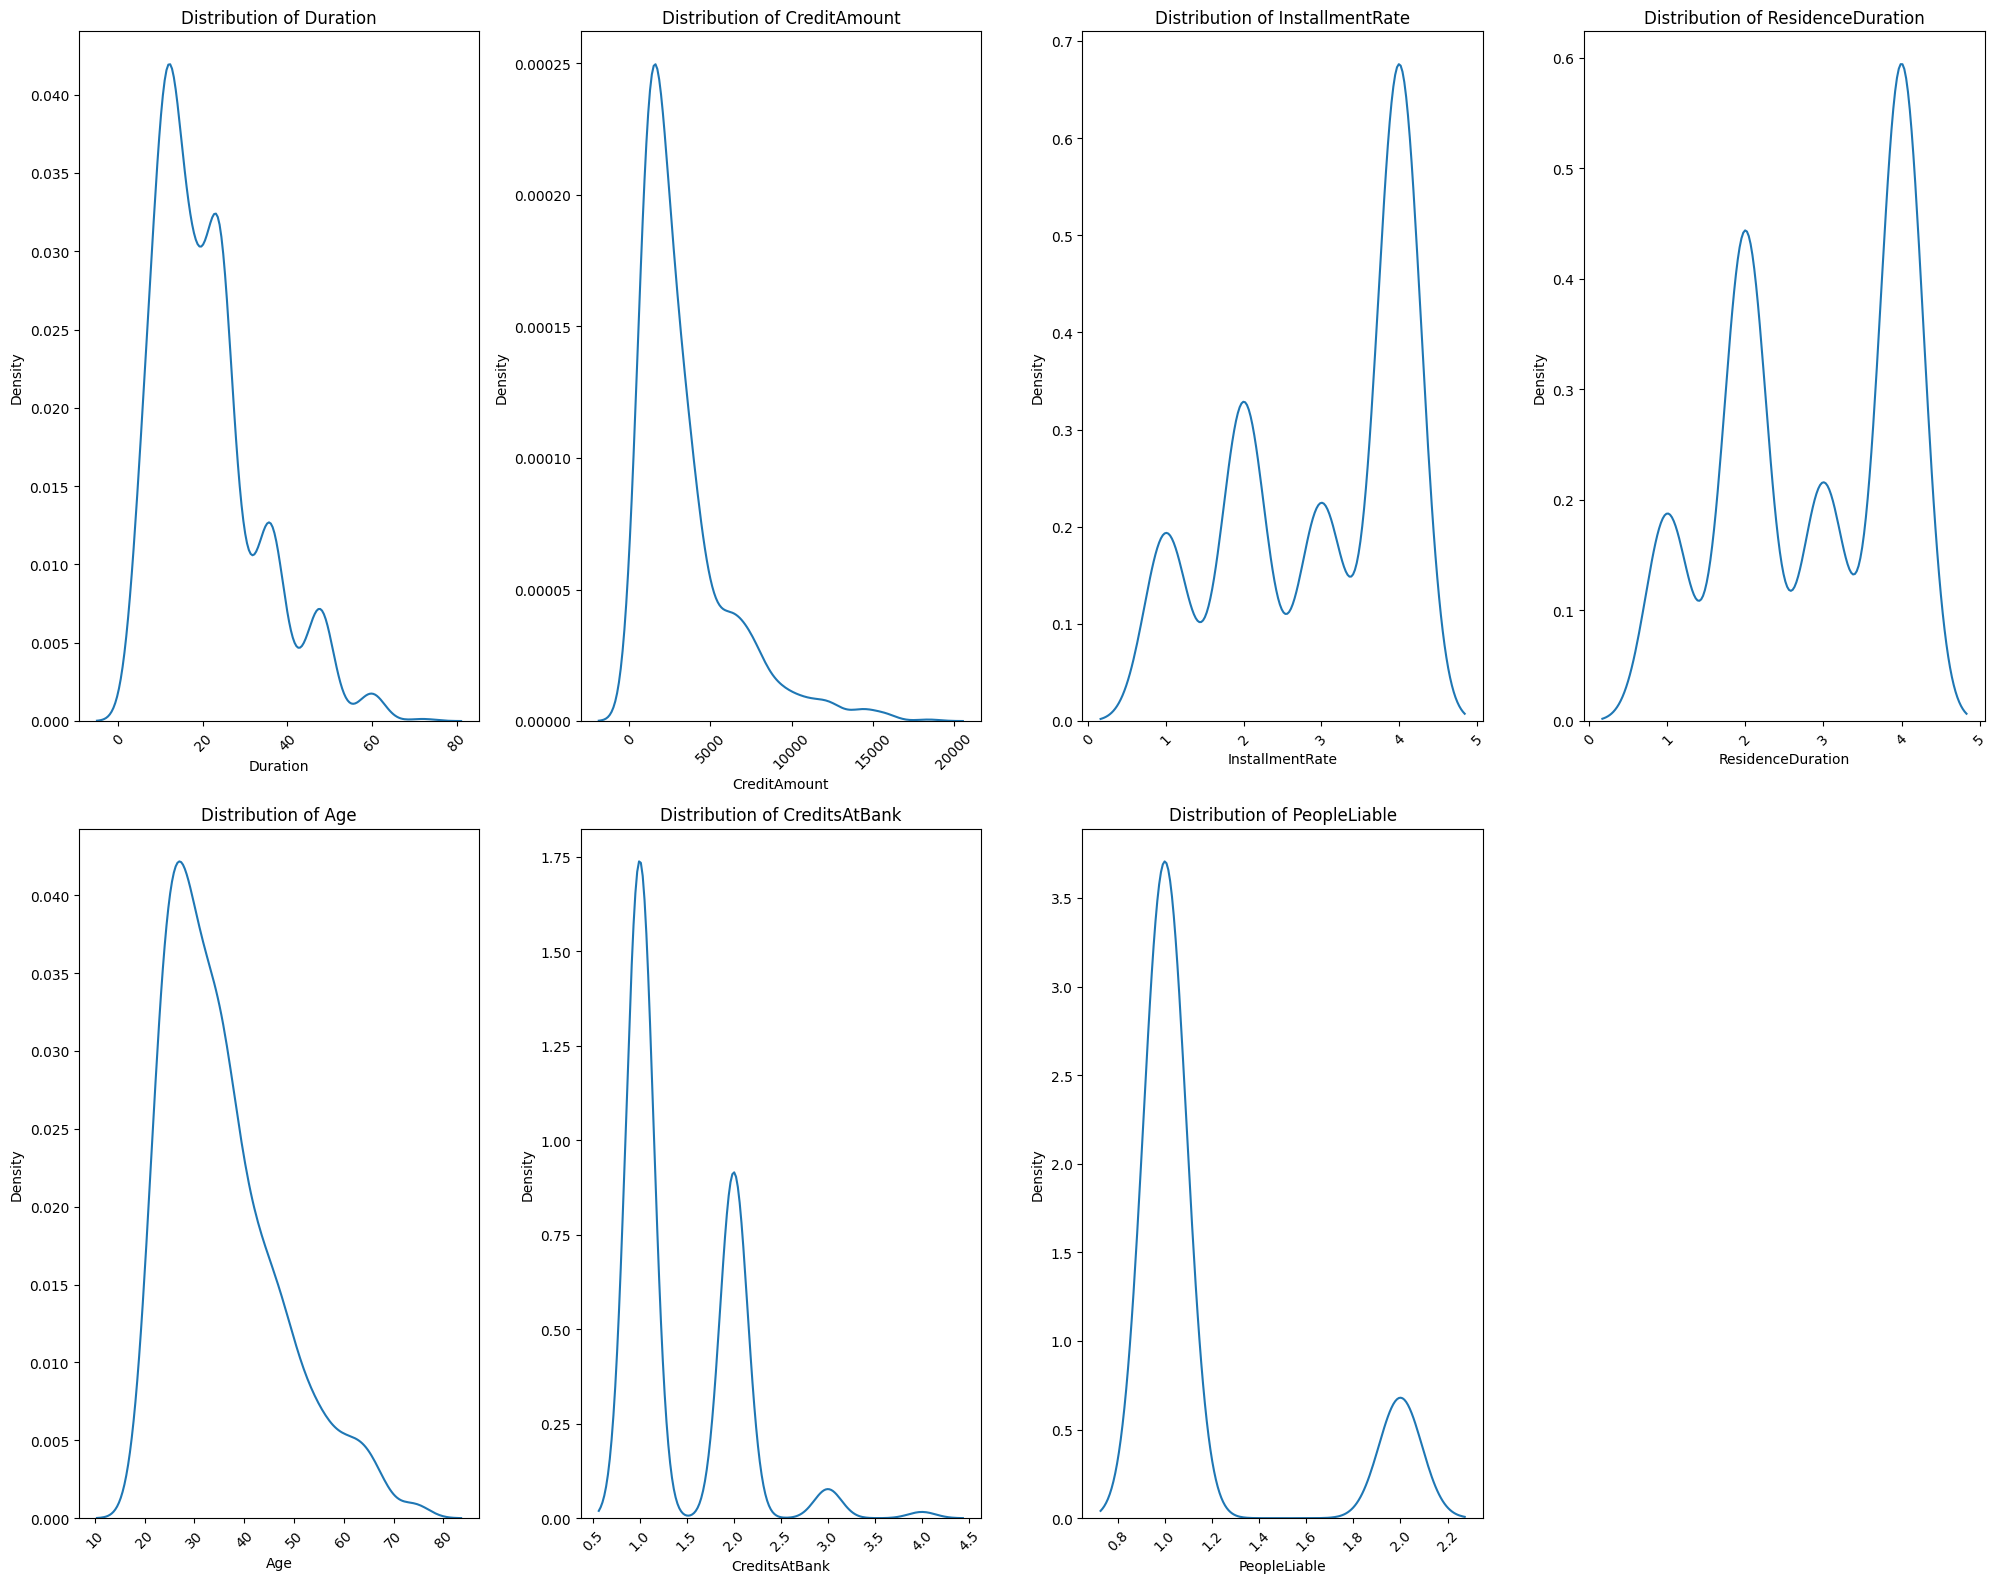

In [9]:

num_plots = len(num_vars)-1
num_columns = 4
num_rows = num_plots // num_columns + (num_plots%num_columns > 0) 
plt.figure(figsize=(num_rows*10,num_columns*4))
for i,col in enumerate(num_vars):
        plt.subplot(num_rows,num_columns,i+1)
        sns.kdeplot(df_viz[col])
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=4, wspace=0.3)

plt.tight_layout()                  

## Univariate Analysis for Numerical Observations

After examining the kernel density plots for the numerical variables in our dataset, we have identified several insights that could influence our understanding and modeling of credit risk.

### Duration

The peak at shorter credit durations suggests that borrowers prefer shorter-term loans, often associated with lower risk and smaller amounts. This preference may also align with the most common credit purposes, like purchasing televisions, where financing needs are typically not long-term. Investigating the correlation between loan duration and specific purposes, such as consumer goods, which tend to require less time to pay off compared to long-term investments, would be valuable.

### Credit Amount

With most credit amounts clustering at the lower end, the data suggests that applicants are generally seeking smaller loans. The long tail of higher loan amounts could indicate a subset of applicants with unique financial needs or higher purchasing power, potentially aligning with specific purposes or status categories that warrant larger credit amounts, such as business investments or home purchases.

### Installment Rate

The varied peaks in installment rates may reflect different financial products or agreements that applicants have chosen. Understanding how these rates relate to default risk is critical, especially if certain rates are indicative of financial strain or misalignment with the borrower's repayment capacity.

### Residence Duration

The multimodal nature of residence duration suggests there are common periods that applicants stay in one residence, possibly reflecting lease terms. The implication that longer residence duration could be associated with better credit risks merits examination, as stability in residence might imply financial stability and reliability.

### Age

The skew towards younger ages in the dataset indicates a focus on the credit behaviors of younger individuals, possibly creating an imbalance that does not capture the financial behaviors of older demographics. This could challenge the model's ability to generalize across all age groups, especially if the dataset underrepresents the credit behavior of older individuals who may have different financial profiles.

### Credits at Bank

The peaks at lower numbers of credits at the bank suggest a tendency towards having fewer credit lines, which might reflect a conservative borrowing behavior or a lower need for multiple credits. This behavior could be advantageous, as applicants with fewer credit lines may present lower risk due to less complex financial obligations.

### People Liable

The sharp peak indicating fewer dependents among most applicants could suggest a lower financial burden in terms of dependents, which might be associated with a lower credit risk. However, this should be carefully analyzed in context, as fewer dependents do not automatically equate to higher creditworthiness.


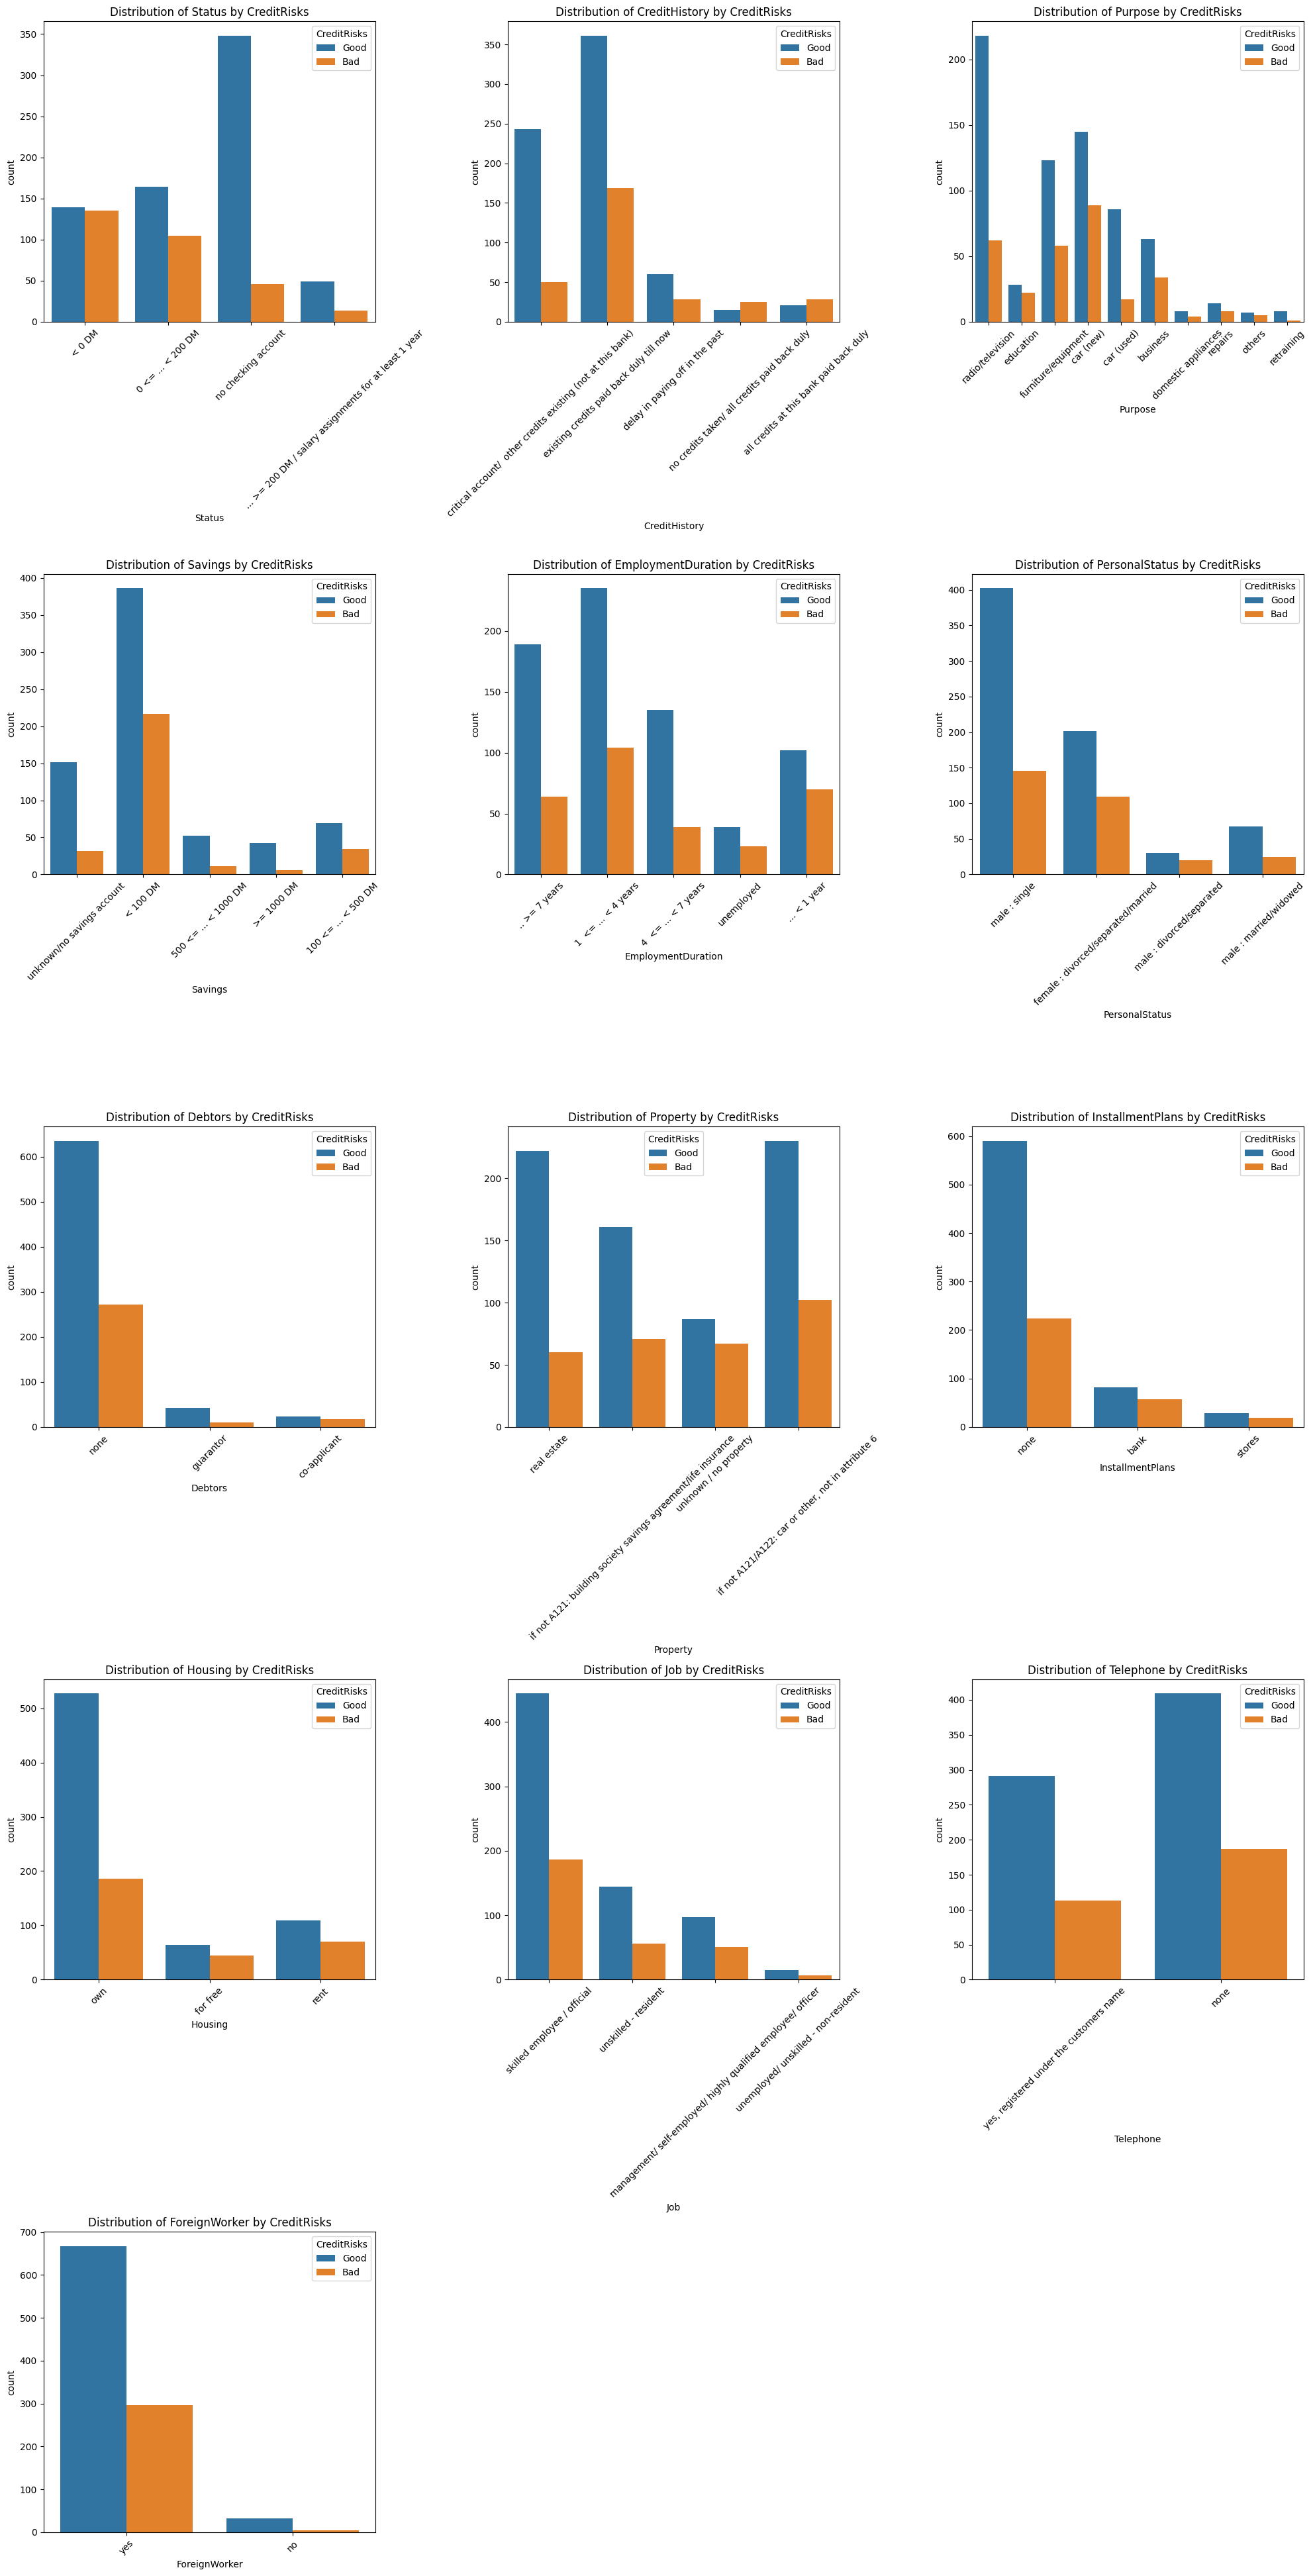

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(cat_vars)-1
num_columns = 3
num_rows = num_plots // num_columns + (num_plots%num_columns > 0)
plt.figure(figsize=(num_rows*4,num_columns*13))
for i,col in enumerate(cat_vars):
    if col!='CreditRisks':
        plt.subplot(num_rows,num_columns,i+1)
        sns.countplot(x=col,data=df_viz,hue='CreditRisks')
        plt.title(f'Distribution of {col} by CreditRisks')
        plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=4, wspace=0.3)

plt.tight_layout()                  
                


## Status, Savings, and Credit Amount

Individuals with lower status and savings tend to have a higher frequency of bad credit. Despite often applying for smaller credit amounts, as indicated by kernel density plots, financial distress seems to be less about the credit size and more about an individual's financial buffer. It's crucial to consider the interaction between status, savings, and credit amount.

## Credit History and Duration

A poor credit history signals risk, with most credits being short-term. This trend suggests short-term credits are likely taken out of necessity, particularly by those with problematic credit histories. Incorporating a feature that captures the combined effect of credit history and loan duration could enhance risk assessment.

## Purpose and Age

Credits with higher default rates, such as for business and education, appear to be favored by younger individuals. This age group's propensity for investing in education or starting businesses, which carry higher risks, suggests that our model should be sensitive to loan purpose, especially for younger customers.

## Employment Duration, Age, and Credit History

Employment duration serves as a stability indicator. The model should account for this alongside age and credit history, especially considering younger individuals with shorter employment histories may have incomplete credit records, posing a risk. Young customers with short employment durations could be considered a distinct, higher-risk group.

## Personal Status and Property

Higher risk is linked to certain personal statuses, while property ownership indicates lower risk. Individuals with riskier personal statuses who lack property could be at significant risk. A feature combining personal status with property ownership could improve risk assessment accuracy.

## Installment Plans, Job, and Credit Amount

The absence of installment plans correlates with lower risk, and job types exhibit varying risk levels. Models should explore the relationship between job types, installment plan presence, and credit amount. For instance, a skilled employee without installment plans seeking a small credit might represent a low-risk scenario.

## Housing, Residence Duration, and Age

Homeownership signals lower risk, with residence duration potentially correlating with age. Older individuals likely own homes and have longer residence durations, indicating stability and financial health. The interaction between age, housing, and residence duration should be leveraged for better risk prediction.

## Telephone, Foreign Worker, and Credit History

Having a telephone and being a foreign worker are associated with good credit, though credit history is a more significant factor. Models should examine these factors in conjunction with credit history, especially for individuals with sparse credit history data, to improve predictions.

## Age and People Liable

The young customer base and the number of dependents may predict credit risk. Younger individuals with dependents could experience more financial strain, impacting their creditworthiness. Models need to consider the specific challenges faced by this demographic.


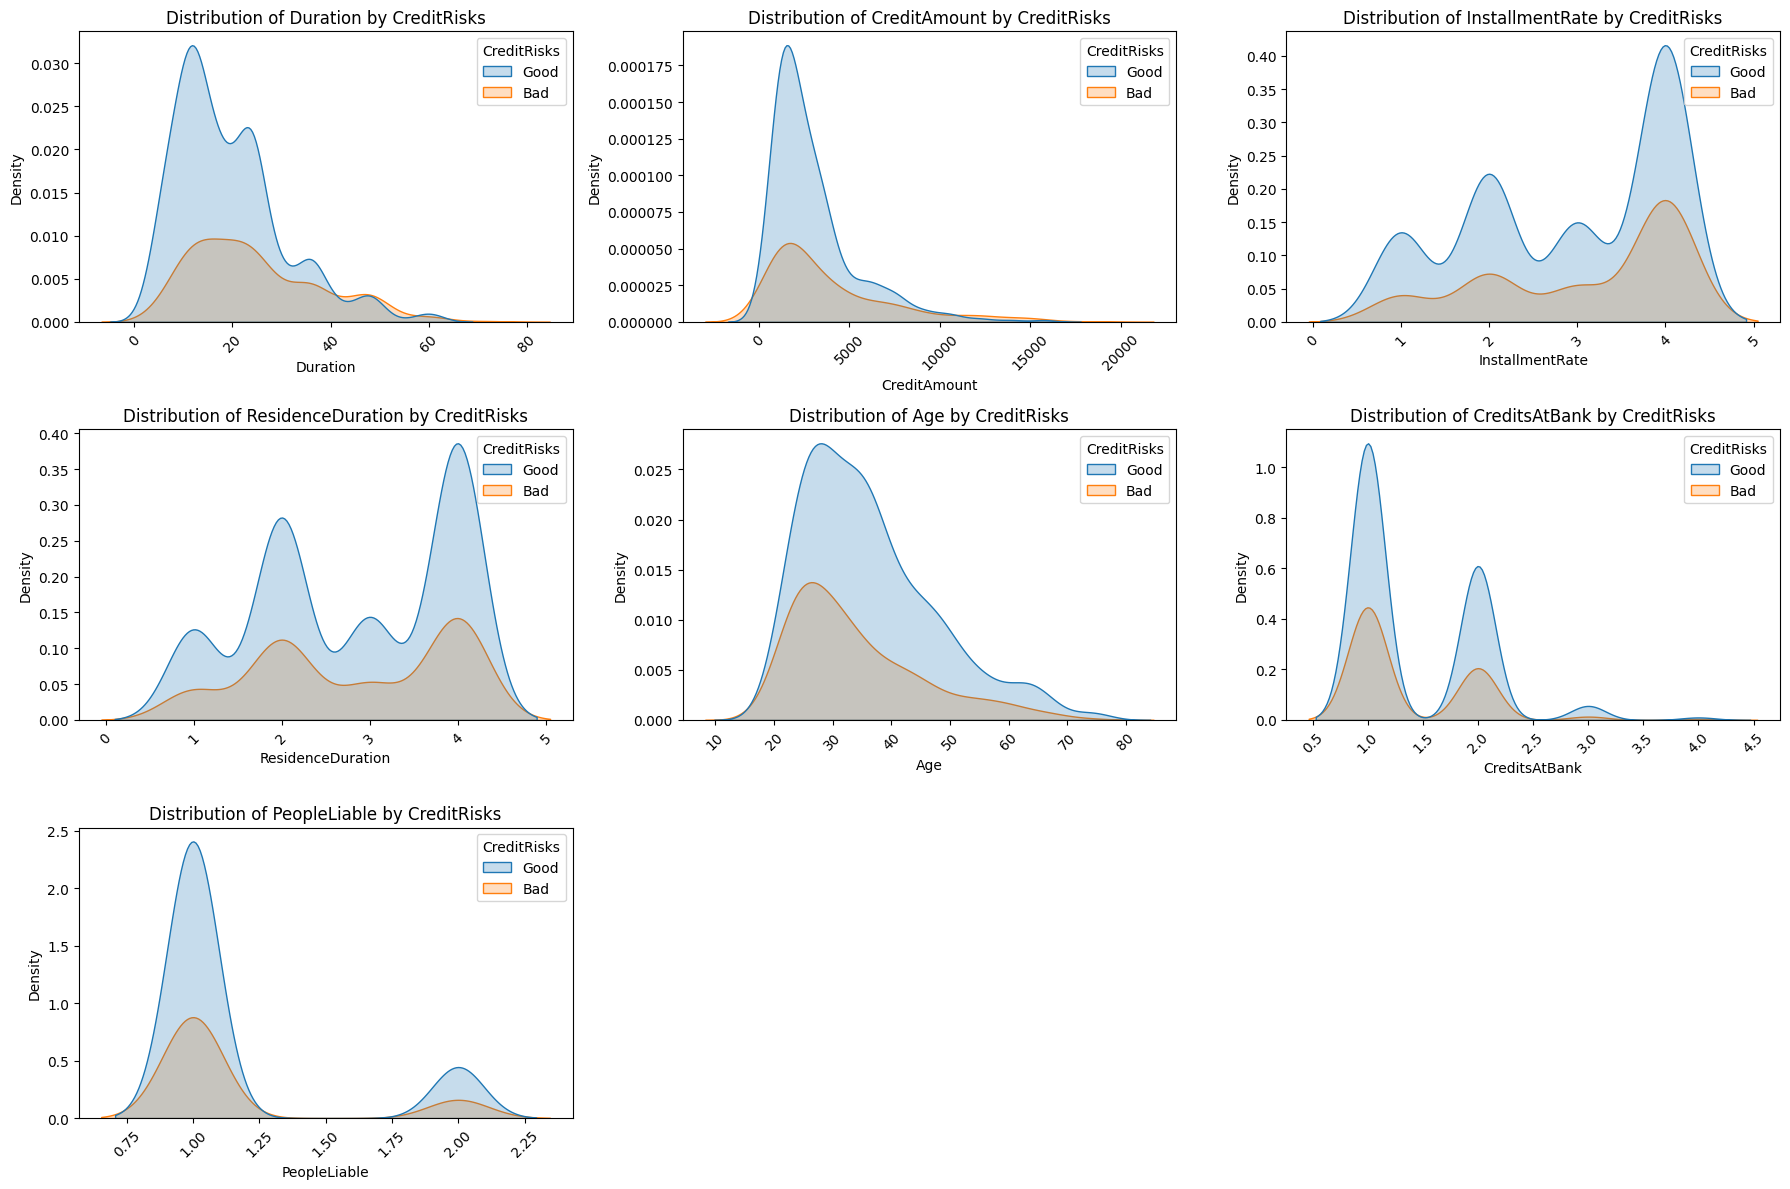

In [11]:
num_plots = len(num_vars)
num_columns = 3
num_rows = num_plots // num_columns + (num_plots % num_columns > 0)

plt.figure(figsize=(num_columns * 6, num_rows * 4))  # La taille peut être ajustée selon vos préférences

for i, col in enumerate(num_vars):
    plt.subplot(num_rows, num_columns, i+1)
    sns.kdeplot(data=df_viz, x=col, hue='CreditRisks', fill=True)
    plt.title(f'Distribution of {col} by CreditRisks')
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5, wspace=0.3) 
plt.tight_layout()  
plt.show()


## Distribution of Duration by Credit Risks

The distribution of credit duration reveals significant differences between good and bad credit risks. While short-term credits are prevalent in both categories, bad credit risks exhibit a wider distribution, suggesting a higher likelihood of engaging in credits across various durations.

## Distribution of Credit Amount by Credit Risks

Good credit risks show a concentration around lower credit amounts, whereas bad credit risks are more dispersed, often involving higher amounts. This pattern indicates a potential correlation between higher loan amounts and increased default risk.

## Distribution of Installment Rate by Credit Risks

Bad credit risks display greater variability in installment rates compared to good credit risks, which tend to have more consistent rates. The variability among bad credit risks might signal an association with higher credit risk due to irregular installment payments.

## Distribution of Residence Duration by Credit Risks

Although both credit risk categories peak at similar residence durations, the distribution for bad credit risks is broader and less concentrated, implying a connection between less stable residence history and higher credit risk.

## Distribution of Age by Credit Risks

Younger individuals are disproportionately represented among bad credit risks, suggesting that youth may be a factor in credit default, possibly due to less established financial histories or stability.

## Distribution of Credits at Bank by Credit Risks

A higher number of existing credits at the bank correlates with bad credit risk status, possibly indicating financial overextension or strain from multiple credit commitments.

## Distribution of People Liable by Credit Risks

There is a notable presence of individuals with no or few dependents across both risk categories, but bad credit risks slightly increase with one or more dependents, hinting at a link between additional financial responsibilities and increased credit risk.


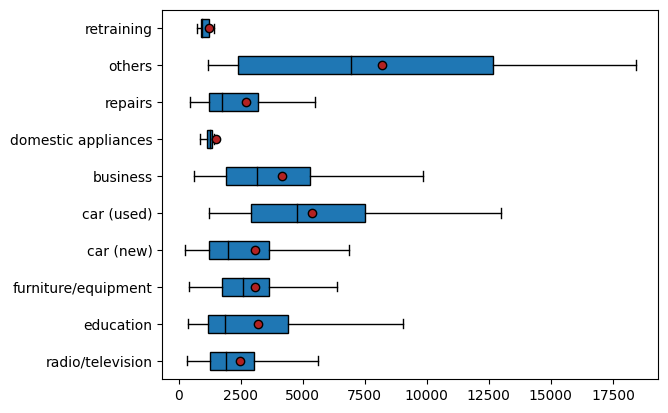

In [70]:
modalites = df_viz["Purpose"].unique()
groupes = []
for m in modalites:
    groupes.append(df_viz[df_viz["Purpose"]==m]["CreditAmount"])
medianprops = {'color':'black'}
meanprops = {'marker':'o','markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels = modalites, showfliers = False, medianprops = medianprops,
           vert = False, patch_artist=True, showmeans = True, meanprops=meanprops)
plt.show()

# Analysis of Loan Purposes and Their Impact on Credit Amounts

## Overview of Loan Purpose Categories

### Radio/Television:
- **Observation**: This category has a relatively tight distribution with a small interquartile range, indicating that credit amounts for these purposes are generally lower and less varied.
- **Median**: Low, with no significant outliers, suggesting these are typically smaller, more uniform loans.

### Education:
- **Observation**: The distribution is also tight, similar to radio/television, but with slightly higher amounts. This suggests consistent loan sizes for education purposes, which could be due to standardized costs like tuition fees.

### Furniture/Equipment:
- **Observation**: The interquartile range is wider than for education or radio/television, indicating more variability in the credit amounts for this purpose.
- **Outliers**: Present on the higher end, suggesting some loans for furniture/equipment can be significantly higher than the average.

### Car (New):
- **Observation**: This category has a wide distribution and a higher median, expected as new cars can be costly.
- **Outliers**: Presence indicates that there are exceptional cases where the credit amount for new cars is quite high.

### Car (Used):
- **Observation**: The median credit amount is lower than for new cars, aligning with the lower cost of used vehicles. The distribution has a considerable spread, indicating variability in the prices of used cars financed.

### Business:
- **Observation**: The box plot shows a wide range, a high median, and outliers, suggesting that credit amounts for starting or supporting a business can vary greatly and can sometimes be very high.

### Domestic Appliances:
- **Observation**: Very tight box plot with a low median, indicating that these loans are typically small and have little variability, likely reflecting the lower cost of domestic appliances.

### Repairs:
- **Observation**: This category has a relatively small interquartile range, but with some high outliers, suggesting that while most repair loans are small, there can be occasional expensive projects.

### Others:
- **Observation**: This category has the widest range and the highest median, indicating significant variability in the credit amounts. The outliers on the higher end suggest that this category might include a variety of different purposes, some of which involve substantial loan amounts.

### Retraining:
- **Observation**: The distribution is tight with no outliers, which suggests that retraining or further education costs are consistent and predictable.

## Notes for Credit Scoring Model
- The 'Purpose' of a loan can be a significant predictor of the 'CreditAmount' and potentially the risk associated with the loan.
- Categories with higher medians and wider distributions might be associated with higher risk due to the larger amounts and variability in loan sizes.
- The presence of outliers, especially in categories like 'Business' or 'Others', may require special attention as they could significantly affect the model's performance.
- Categories with tighter distributions and fewer outliers, such as 'Education' and 'Domestic Appliances', may be easier to predict and less risky.
- The model could include interaction terms between 'Purpose' and 'CreditAmount' to capture their combined effect on credit risk. The relationship between 'Purpose' and other variables such as 'Duration' and 'Age' could also be considered to improve the model's accuracy.


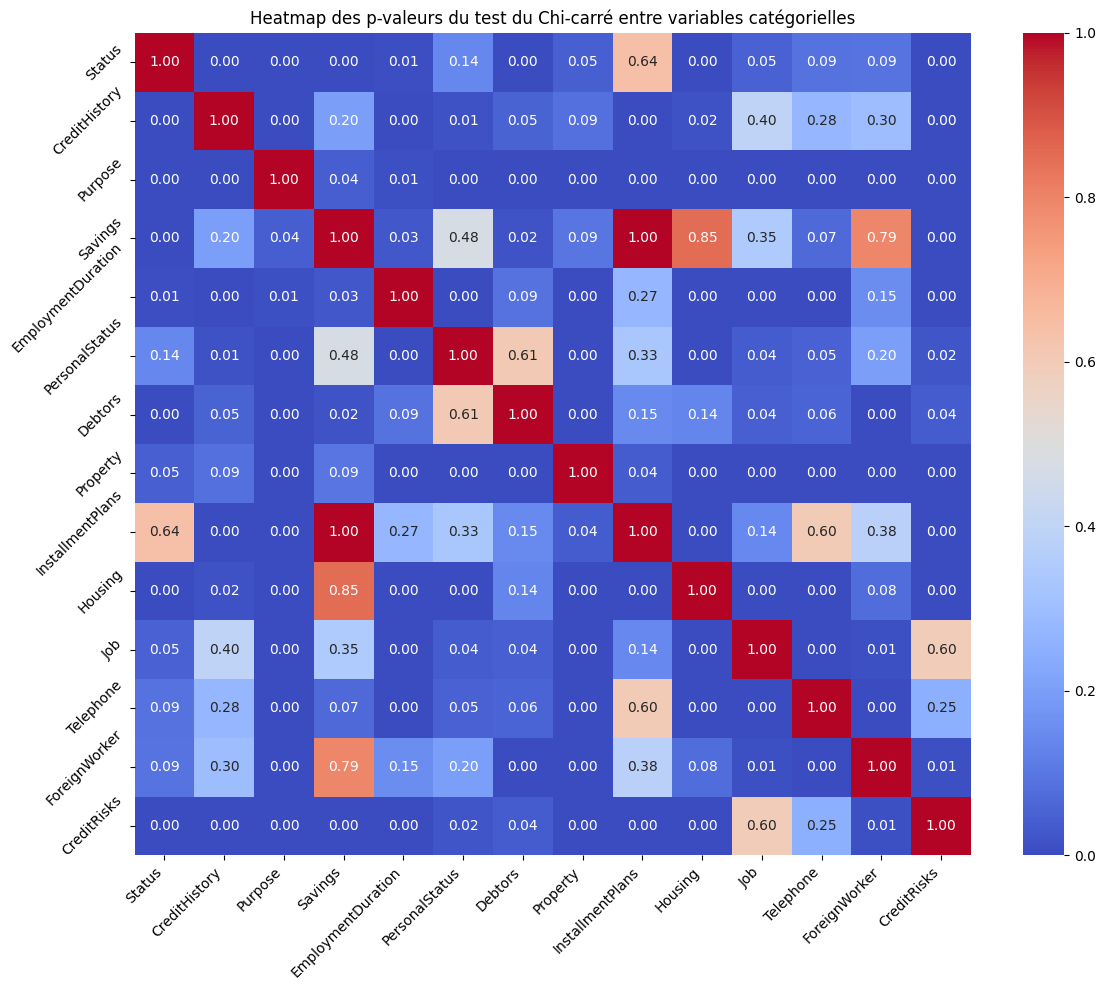

In [69]:
p_values_chi2 = pd.DataFrame(np.nan, index=cat_vars, columns=cat_vars)

for i, var1 in enumerate(cat_vars):
    for var2 in cat_vars[i+1:]:  
        contingency_table = pd.crosstab(df_viz[var1], df_viz[var2])
        chi2, p, dof, ex = chi2_contingency(contingency_table, correction=False)
        p_values_chi2.at[var1, var2] = p
        p_values_chi2.at[var2, var1] = p 

p_values_chi2_filled = p_values_chi2.fillna(1)

plt.figure(figsize=(12, 10))
sns.heatmap(p_values_chi2_filled, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Heatmap des p-valeurs du test du Chi-carré entre variables catégorielles')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


| Variable 1         | Variable 2         | Association Significance | Comments                                                                                       |
|--------------------|--------------------|--------------------------|------------------------------------------------------------------------------------------------|
| Status             | PersonalStatus     | Not Significant          | The status of a checking account is not strongly related to personal statuses such as marital status or gender. |
| Credit History     | Savings            | Not Significant          | There is no strong association between an individual's credit history and their savings.        |
| Savings            | Employment Duration| Not Significant          | The duration of someone's employment is not strongly related to how much they have in savings.  |
| Savings            | PersonalStatus     | Not Significant          | There is no strong association between the amount in savings and the personal status of an individual. |
| Savings            | Debtors            | Not Significant          | The presence of a co-applicant or guarantor does not show a strong association with the amount of savings a person has. |
| Savings            | Property           | Not Significant          | The amount of savings does not have a strong association with property ownership.               |
| Employment Duration| Debtors            | Not Significant          | The duration of employment does not show a strong association with the presence of a co-applicant or guarantor. |
| Employment Duration| Installment Plans  | Not Significant          | There is no strong association between how long someone has been employed and whether they have installment plans. |
| Employment Duration| ForeignWorker      | Not Significant          | The employment duration of an individual does not show a strong association with whether they are a foreign worker. |
| PersonalStatus     | ForeignWorker      | Not Significant          | The relationship between personal status and whether an individual is a foreign worker is not strongly associated. |
| Property           | ForeignWorker      | Not Significant          | Property ownership does not have a strong association with the variable indicating if someone is a foreign worker. |
| Installment Plans  | Housing            | Not Significant          | Whether an individual has installment plans does not show a strong association with their housing situation. |
| Job                | ForeignWorker      | Not Significant          | The type of job someone has is not strongly associated with whether they are a foreign worker.   |
| Status             | Credit History     | Significant              | The status of a checking account might influence or reflect an individual's credit history.     |
| Status             | Purpose            | Significant              | The status of a checking account may influence the purpose for which credit is sought.          |
| Status             | Savings            | Significant              | Individuals with higher savings are likely to have a more positive checking account status.     |
| Credit History     | Purpose            | Significant              | The reason for taking out a loan may be related to one’s credit history.                        |
| Purpose            | Savings            | Significant              | The amount of savings someone has could influence the purpose for which they are seeking credit.|
| Employment Duration| Personal Status    | Significant              | Reflects societal trends where certain groups have longer employment durations.                 |
| Employment Duration| Job                | Significant              | Certain job categories may offer longer contracts or more stability.                            |
| Personal Status    | Job                | Extremely Significant    | Demographic and socio-economic factors correlate certain job types with marital status or gender. |
| Personal Status    | Property           | Significant              | Marital status or gender could influence property ownership.                                    |
| Debtors            | Purpose            | Significant              | Having co-applicants or guarantors could be more common for certain credit purposes.            |
| Property           | Housing            | Significant              | The type of property someone owns will influence their housing situation.                       |
| Job                | Housing            | Significant              | Certain job categories may afford different types of housing more easily.                       |


C:\Users\Zahra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 5000x1000 with 0 Axes>

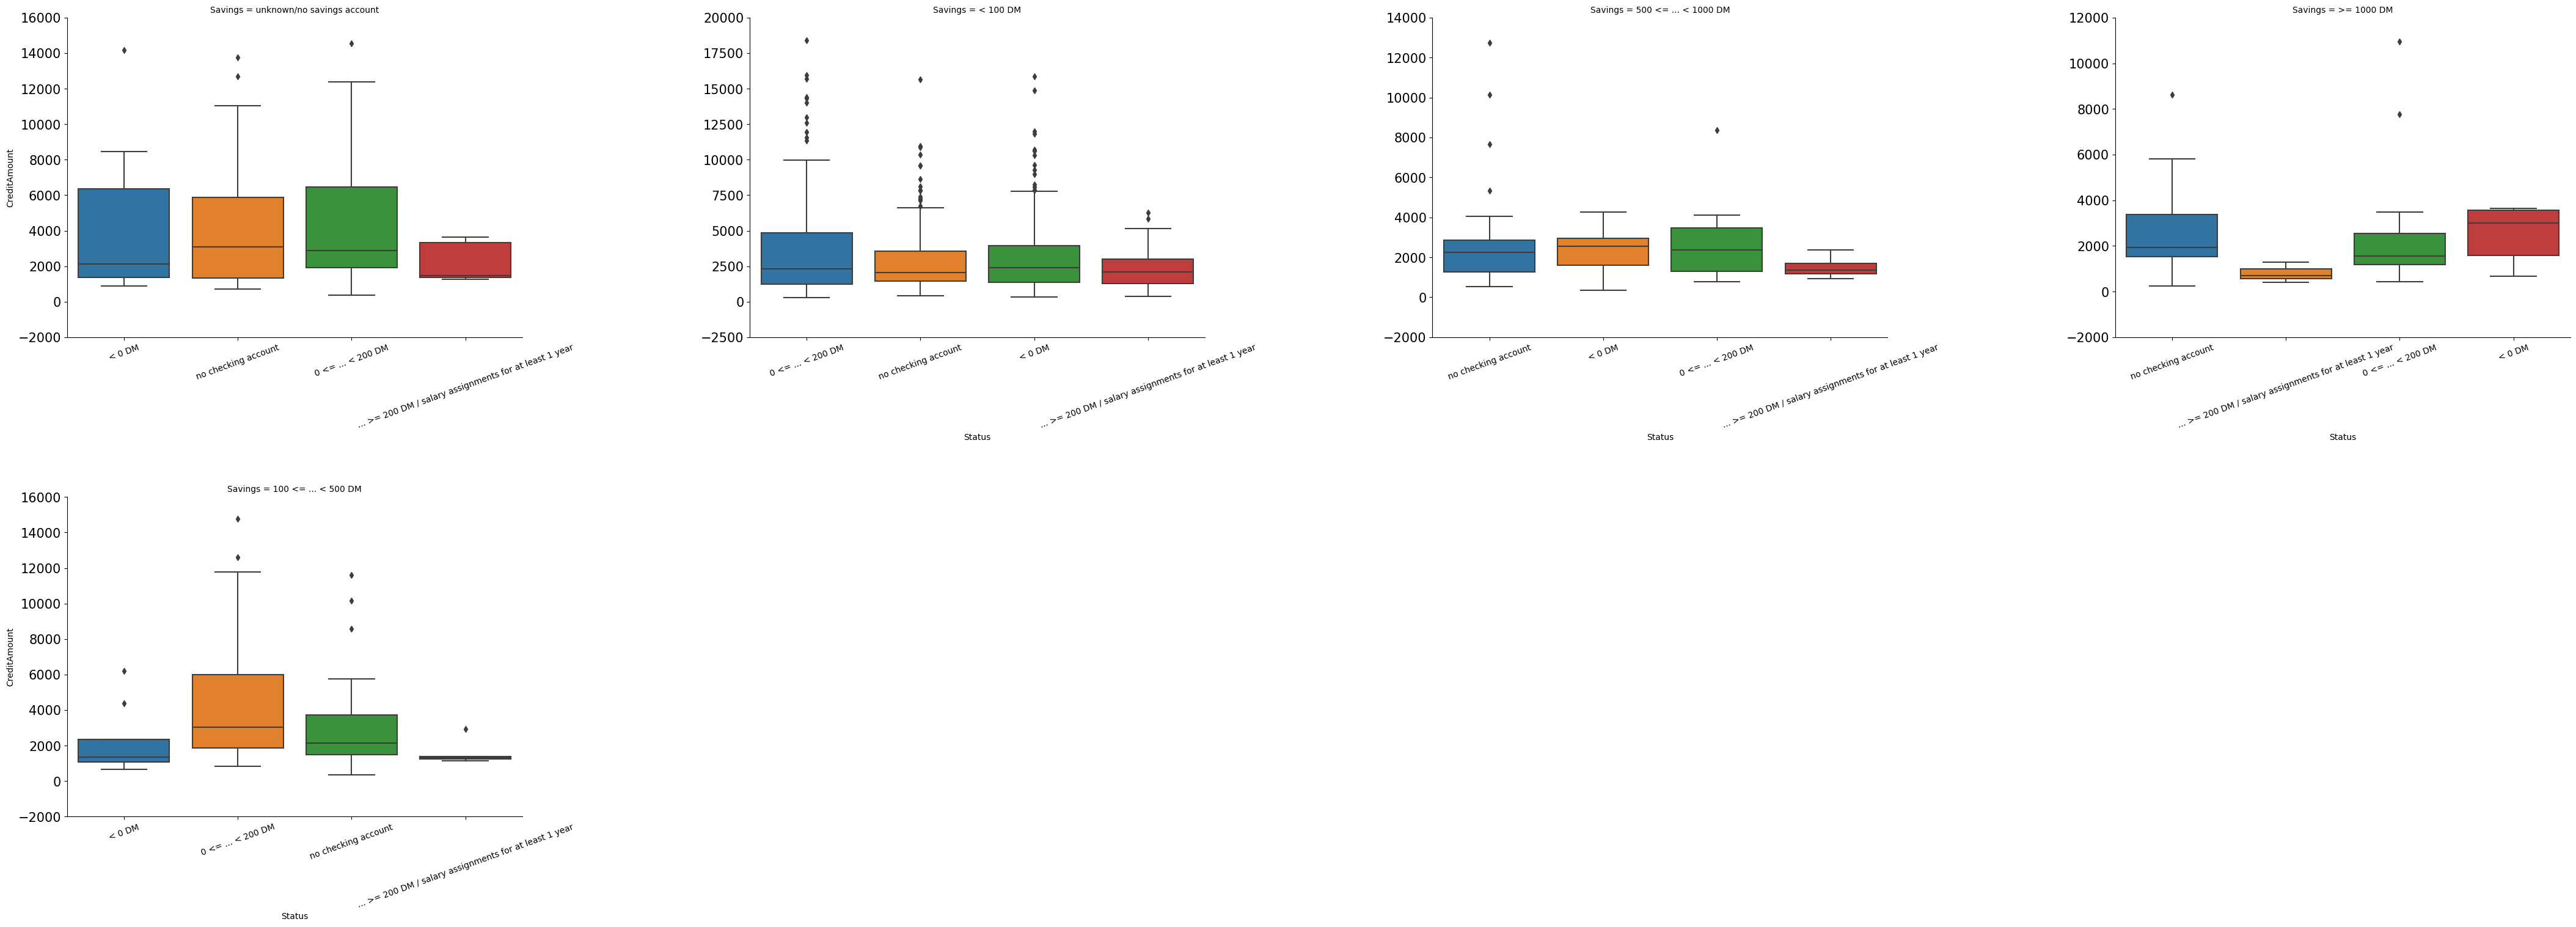

In [99]:
plt.figure(figsize=(50,10))
g = sns.catplot(
    data=df_viz, 
    x='Status', 
    y='CreditAmount', 
    col='Savings', 
    kind='box',
    col_wrap=4,  
    sharex=False, 
    sharey=False,
    height=7, 
    aspect=1.5
)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Rotate the x-axis labels if they are overlapping
g.set_xticklabels(rotation=20)

# Set the y-axis labels with a smaller font size
g.set_yticklabels(fontsize=15)

# Show the plot
plt.show()

# Financial Behavior from Checking Account Status and Savings

## Checking Account Status

The observation that individuals with either no checking account or a high positive balance tend to borrow less could reflect a degree of financial stability or a more conservative approach to financial management. This pattern suggests that such individuals may rely less on borrowing, possibly due to having sufficient funds to cover their needs without resorting to loans.

## Savings

There's a clear correlation between higher savings and lower borrowing, supporting the notion that individuals with a greater financial cushion are less inclined to take on debt. This behavior indicates that those with more savings might not feel the necessity to borrow as much, preferring smaller loans that are easier to manage or avoiding debt altogether when possible.

## Risk Profile

The presence of outliers in categories of lower savings points to some individuals taking on loans that are large relative to their savings. This trend could signify a higher risk profile, as it suggests that individuals with less financial backup are willing to commit to larger debts. This behavior poses potential risks, both for the borrower, in terms of financial strain, and for the lender, in terms of increased default risk.
